In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#os.getcwd()
#os.listdir('/kaggle/input/')
os.listdir('/kaggle/input/landfillwaste/dataset/ML')

['Training', 'Testing']

In [3]:
os.listdir('/kaggle/input/landfillwaste/prediction')

['Test']

# Step 1: Gather Data and Identify the Deep Learning Problem
 - Convolutional Neural Networks (CNN), are a powerful deep learning models for multiclass image classification problems. 
 
 - The dataset consists of a collection of 4752 raw color images of landfill waste produced by humans and societal activities.
 
 - The Dataset is obtained from UCI Machine Learning Respository, with a research paper on " *** RealWaste: A Novel Real-Life Data Set for Landfill Waste Classification Using Deep Learning *** " By Sam Single, Saeid Iranmanesh, Raad Raad. Published in 2023.
 
 - Research paper link:  https://www.mdpi.com/2078-2489/14/12/633
 
 - The images have a resolution of 524 X 524, and are collected from 9 different material type. They are listed below with the following labels and their count:
   - Cardboard - 461
   - Food Organics - 411
   - Glass - 420
   - Metal - 790
   - Miscellaneous Trash - 495
   - Paper - 500
   - Plastic - 921
   - Textile Trash - 318
   - Vegetation - 436
   
 
 -  This project aims to understand the CV tasks such as preprocessing, feature extraction and image classification by using multiple CNN architectures on Landfill Waste images and compare their performances.
 
 -  By applying Image preocessing and Deep Learning with computer vision techniques, we can automate waste detection and classification based on visual characterisitcs for efficient sorting and recycling efforts as mentioned     in the research paper. 
 
 -  The reasearch paper used **VGG-16, InceptionResNetV2, DenseNet121, Inception V3, and MobileNetV2** models to classify real-life waste.
 
 -  I will use 3 CNN models:  1 **Simple CNN** model from scratch, and 2 **pretrained models - (ResNet-50 and Xception)** and compare their performances based on accuracy and loss.
 
 -  This results from this study will be useful for implementing long-term monitoring of waste sorting quality that enables decision support for waste management systems and further reearch on consumer behavior.  
 
 

### Resources:

- 1. RealWaste: A Novel Real-Life Data Set for Landfill Waste Classification Using Deep Learning - https://www.mdpi.com/2078-2489/14/12/633
- 2. Detecting glass and metal in consumer trash bags during waste collection using convolutional neural networks - https://www.sciencedirect.com/science/article/pii/S0956053X20305432
- 3. Simple Image Classification with ResNet-50 - https://medium.com/@nina95dan/simple-image-classification-with-resnet-50-334366e7311a
- 4. Exploring ResNet50: An In-Depth Look at the Model Architecture and Code Implementation - https://medium.com/@nitishkundu1993/exploring-resnet50-an-in-depth-look-at-the-model-architecture-and-code-implementation-d8d8fa67e46f
- 5. Xception: Deep Learning with Depthwise Separable Convolutions - https://arxiv.org/pdf/1610.02357v3
- 6. Classification with KerasHub - https://keras.io/guides/keras_hub/classification_with_keras_hub/

## Import all necessary libraries

In [4]:
#ignore warnings 
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random, os, glob 
import cv2
from PIL import Image
import seaborn as sns 
import matplotlib.pyplot as plt
import re
import itertools
import operator



import skimage
from skimage import io 
import sklearn
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

import keras
from keras import layers
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Sequential, load_model
from keras.layers import Activation, BatchNormalization, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image

## Load the Data (Images)
- The dataset has been split into 3 differednt folders - train, valid and test set .
- The train data has 4392 images.
- The valid data has 180 images.
- The test data has 180 images.

In [5]:
train_images_path = "/kaggle/input/landfillwaste/dataset/ML/Training"
validation_images_path = "/kaggle/input/landfillwaste/dataset/ML/Testing"
test_images_path = "/kaggle/input/landfillwaste/prediction/Test"

# Step 2: Exploratory Data Analysis - Image Preprocessing, Data Split, Augmentation
 - The dataset will be split into training and test data.
 - We will perform Image Preprocessing on the training data to enhance image quality which is vital for computer vision applications. 
 - There are sevral techniques used in **image preprocessing** such as **resizing,normalization,noise reduction etc**.
 - Image preprocessing also decreases model training time and increases model inference speed. 
 - If input images are particularly large, reducing the size of these images will dramatically improve model training time without significantly reducing model performance.
 - Resizing and cropping images is an important first step in image preprocessing.
 - Images come in all shapes and sizes, but standard size is often 224x224 or 256x256 pixels for computer vision applications.
 - It is important to normalize the pixel values to have a consistent brightness and improve contrast which makes the images more suitable for analysis and allows the models to learn patterns independent of lighting      conditions.
 - The most common normalization technique is rescaling the pixel values to range from 0 to 1.
 - Image filters are used to reduce noise, sharpen details, and overall improve the quality of the images before analysis.
 - **Data augmentation** is a technique used to artificially expand the size of the training dataset by generating new images from existing ones to increase variability in the dataset and reduce overfitting, thus improving the generalization of our model.
 - The most commonly used operations are - **Rotation, Shearing, Zooming, Cropping, Flipping, Changing the brightness level**
 - Image preprocessing steps are applied to training and test sets, whereas Image augmentation is only applied to the training data.

In [6]:
import cv2
# Load a sample image
img = cv2.imread('/kaggle/input/landfillwaste/dataset/ML/Training/Paper/Paper_108.jpg')
print(' Original Image shape:', img.shape)

 Original Image shape: (524, 524, 3)


## Preprocessing and Augmentation on the train dataset

In [7]:
# Split the dataset into Train and Test set

target_size = (224,224)
batch_size = 32

# Performing augmentation only on the training data
train = ImageDataGenerator(    
    rescale=1.0/255, # Normalize
    rotation_range= 10,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    zoom_range= 0.2,
    horizontal_flip = True,
    fill_mode='nearest',
    #brightness_range=[0.5, 1.5],  # Brightness adjustment
    #shear_range= 0.2,  # Shear transformation
    #channel_shift_range=0.2  # Channel intensity shift
)  


train_generator = train.flow_from_directory(train_images_path,
                                            batch_size= 32,
                                            shuffle=True,   
                                            seed = 1324,
                                            class_mode='categorical',
                                            target_size= target_size
                                            )



Found 4392 images belonging to 9 classes.


In [8]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training dataset\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training dataset

0 : Cardboard
1 : Food Organics
2 : Glass
3 : Metal
4 : Miscellaneous Trash
5 : Paper
6 : Plastic
7 : Textile Trash
8 : Vegetation


## Visualize the train set data

['Metal', 'Glass', 'Paper', 'Vegetation', 'Cardboard', 'Textile Trash', 'Food Organics', 'Plastic', 'Miscellaneous Trash']


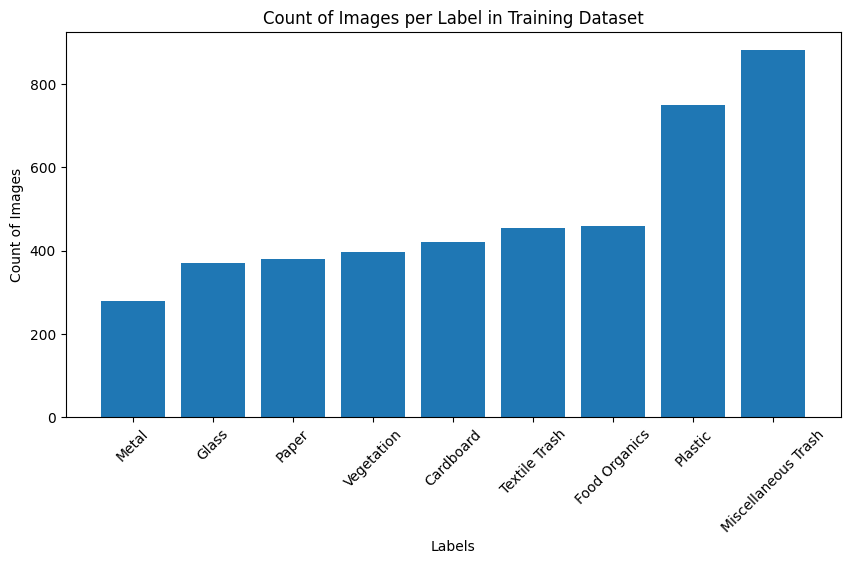

In [10]:
from collections import Counter
train_img = os.listdir(train_images_path)

# Get list of labels (directory names)
list_label = [d for d in os.listdir(train_images_path) if os.path.isdir(os.path.join(train_images_path, d))]
print(list_label)

 
# Count the number of images per label
image_count_per_label = Counter()
for label in list_label:
    image_count_per_label[label] = len(os.listdir(os.path.join(train_images_path, label)))

# Plotting the count of images per label
plt.figure(figsize=(10, 5))
plt.bar(image_count_per_label.keys(), sorted(image_count_per_label.values()))
plt.xlabel('Labels')
plt.ylabel('Count of Images')
plt.title('Count of Images per Label in Training Dataset')
plt.xticks(rotation=45)
plt.show()

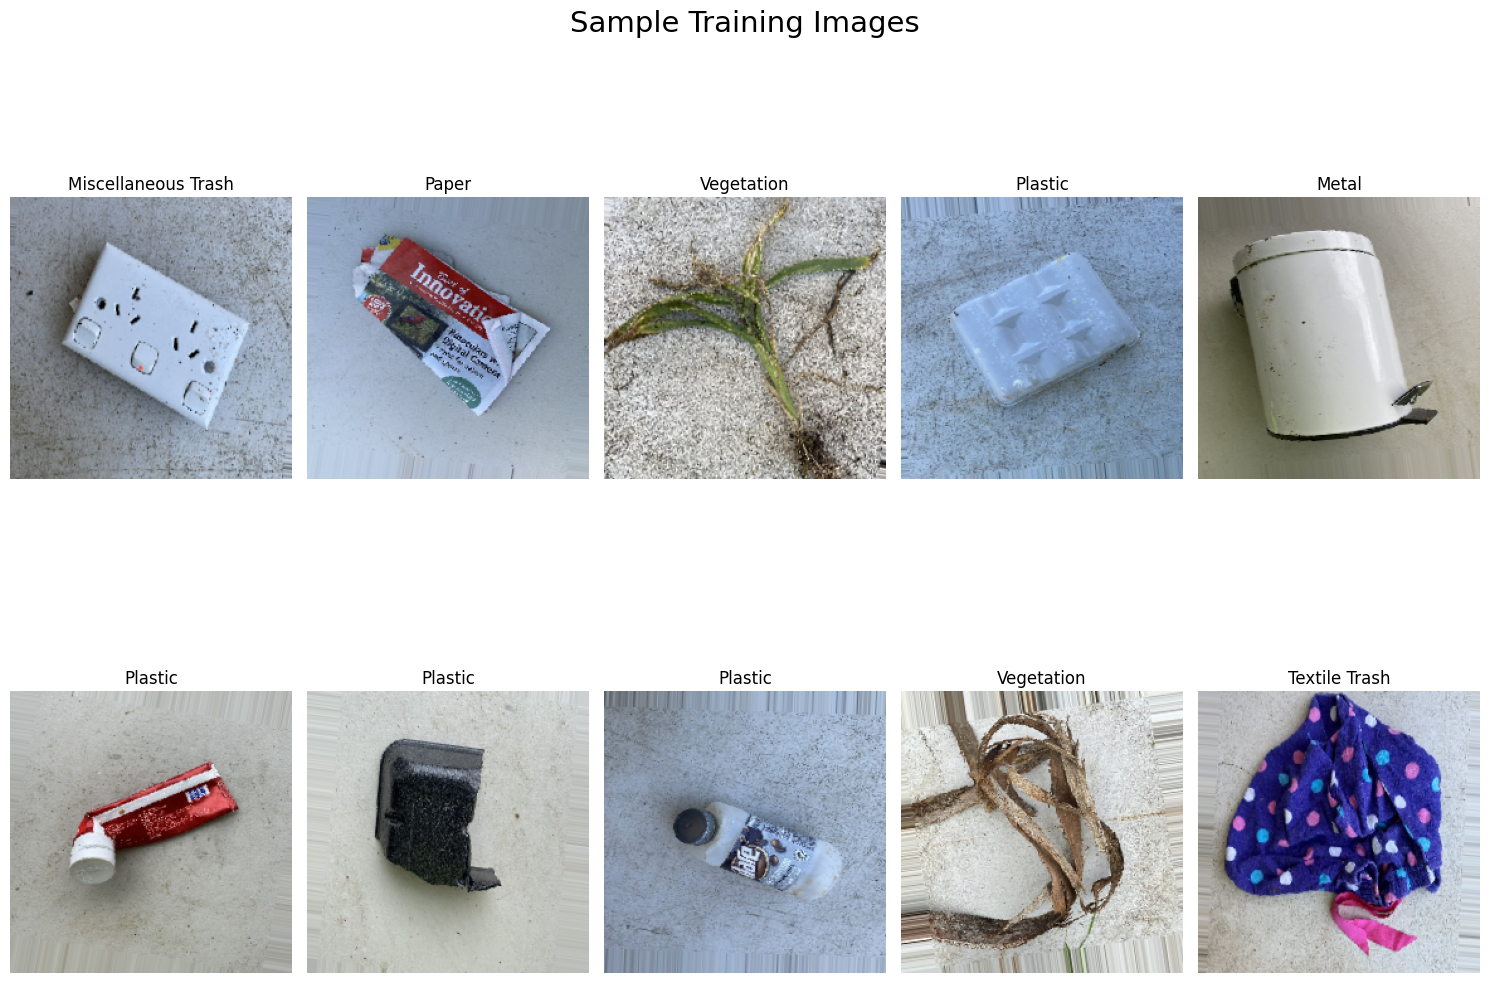

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

## Preprocessing on the validation dataset

In [13]:
valid = ImageDataGenerator(rescale =1.0/255) # Normalize
valid_generator = valid.flow_from_directory(validation_images_path,
                                          shuffle=True,
                                          batch_size = 32,
                                          seed = 1234,
                                          class_mode = 'categorical',
                                          target_size = (target_size) 
                                         )

Found 180 images belonging to 9 classes.


## Visualize the validation set data

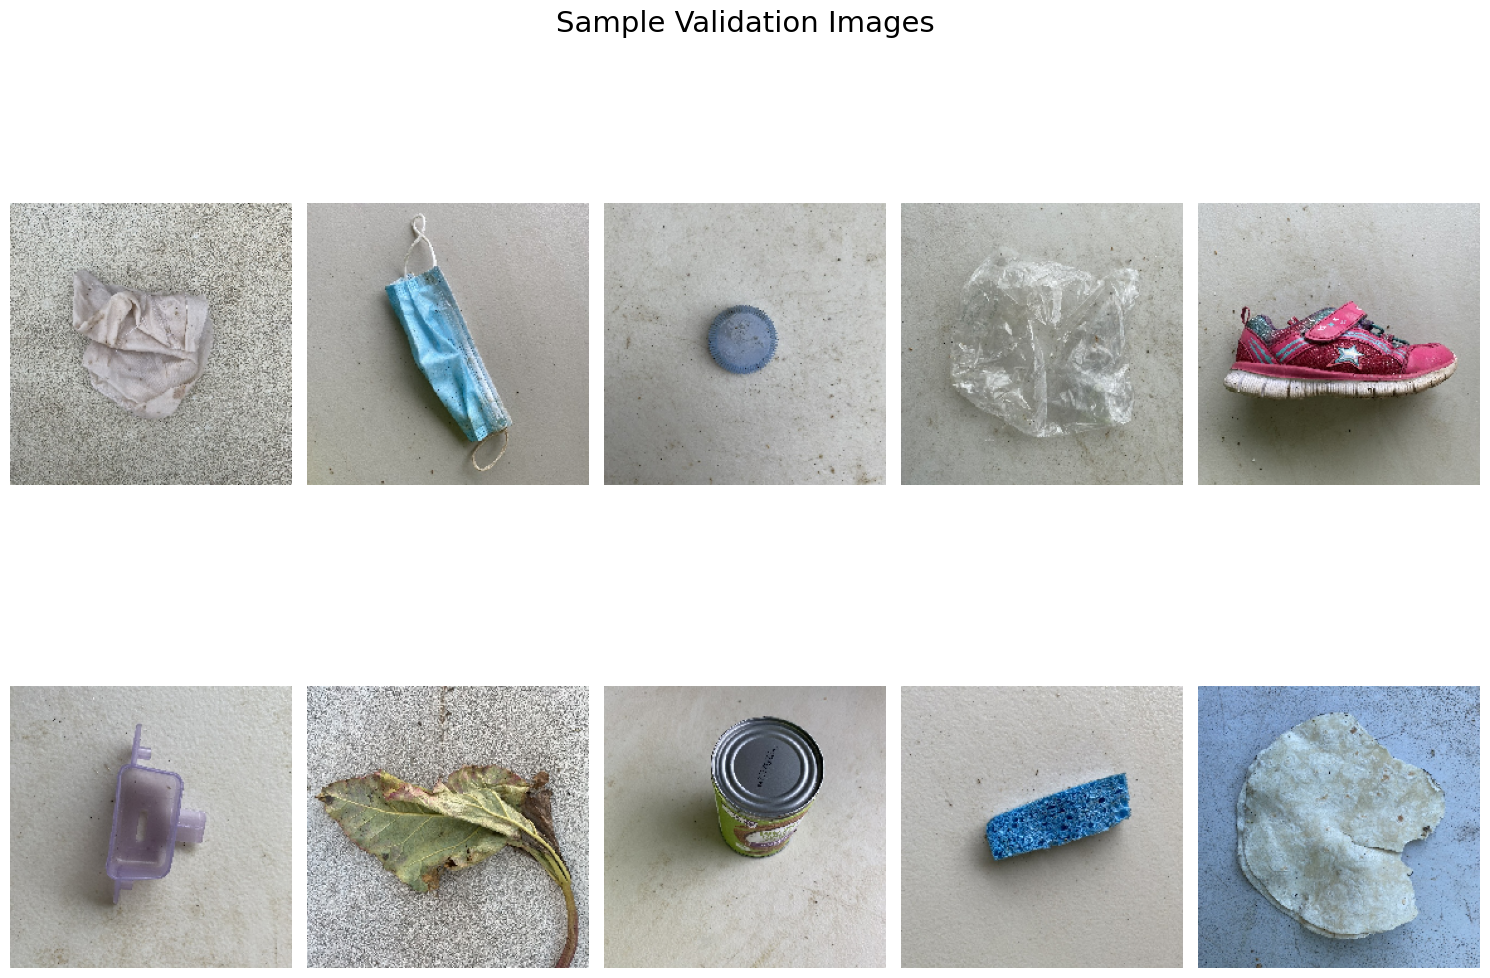

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(valid_generator[0][1][idx])]
        ax[i, j].imshow(valid_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Validation Images", fontsize=21)
plt.show()

# Step 3 : Implementing CNN architectures for model building and training
- CNNs are deep,feedf forward neural networks which consists of several hidden layers and an output layer.
- The components of CNN are - **Convolutional layer, pooling(down-sampling) layer, flattening layer and fully connected layer**.
- **Classification**: Task of this project is to classify the images from the test dataset into 9 classes of landfill waste. 

## a. Simple CNN Model from scratch

In [15]:
def create_model():
    model = Sequential([
        
        Conv2D(filters=64, kernel_size=(3,3), padding='same', input_shape=(224, 224, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        BatchNormalization(),
        Dropout(0.3),
        
        Conv2D(filters=128, kernel_size=(3, 3), padding='same'), #, kernel_regularizer=l2(0.001)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        BatchNormalization(),
        Dropout(0.4),
        
        Conv2D(filters=256, kernel_size=(3, 3), padding='same'), #, kernel_regularizer=l2(0.001)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        BatchNormalization(),
        Dropout(0.5),
        
        Conv2D(filters=512, kernel_size=(3, 3), padding='same'), #, kernel_regularizer=l2(0.001)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2), strides=2),
        BatchNormalization(),
        Dropout(0.5),
        
         # Fully Connected Layers
        Flatten(),
        Dense(units=256, activation='relu'), # , kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(units=128, activation='relu'), # , kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(units=64, activation='relu'), #, kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(units=9, activation='softmax')
    ])
    
    return model

In [16]:
cnn_model = create_model()
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 28, 28, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 27,288,713 (104.10 MB)

 Trainable params: 27,285,897 (104.09 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [17]:
callbacks = [ keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras")]
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

optimizer = Adam(learning_rate= 3e-4)

cnn_model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn_model.fit(train_generator, epochs= 15, validation_data = valid_generator,
                       verbose=1 ,callbacks=[reduce_lr])

Epoch 1/15


I0000 00:00:1730786178.547180    3944 service.cc:145] XLA service 0x7a713c009430 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730786178.547254    3944 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  2/138 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.0781 - loss: 3.7610 

I0000 00:00:1730786195.319207    3944 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 69/138 ━━━━━━━━━━━━━━━━━━━━ 42s 615ms/step - accuracy: 0.1773 - loss: 2.9287

I0000 00:00:1730786237.027042    3944 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_2', 36 bytes spill stores, 36 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_reduce_window_fusion_4', 24 bytes spill stores, 24 bytes spill loads



138/138 ━━━━━━━━━━━━━━━━━━━━ 98s 533ms/step - accuracy: 0.1895 - loss: 2.8266 - val_accuracy: 0.1111 - val_loss: 3.1220 - learning_rate: 3.0000e-04
Epoch 2/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 58s 401ms/step - accuracy: 0.2694 - loss: 2.3567 - val_accuracy: 0.1111 - val_loss: 3.6043 - learning_rate: 3.0000e-04
Epoch 3/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 57s 391ms/step - accuracy: 0.3273 - loss: 2.0718 - val_accuracy: 0.1444 - val_loss: 3.0815 - learning_rate: 3.0000e-04
Epoch 4/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 57s 392ms/step - accuracy: 0.3789 - loss: 1.8959 - val_accuracy: 0.1667 - val_loss: 3.1580 - learning_rate: 3.0000e-04
Epoch 5/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 57s 395ms/step - accuracy: 0.3867 - loss: 1.8283 - val_accuracy: 0.2222 - val_loss: 2.3446 - learning_rate: 3.0000e-04
Epoch 6/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 57s 393ms/step - accuracy: 0.4182 - loss: 1.7329 - val_accuracy: 0.2056 - val_loss: 2.6470 - learning_rate: 3.0000e-04
Epoch 7/15
138/138 ━━━━━━━━━━━━━━━━━━━━ 57s 395ms/step - 

### Analysis: After 15 epochs, we got training accuracy ~ 55% and validation accuracy ~ 40%.

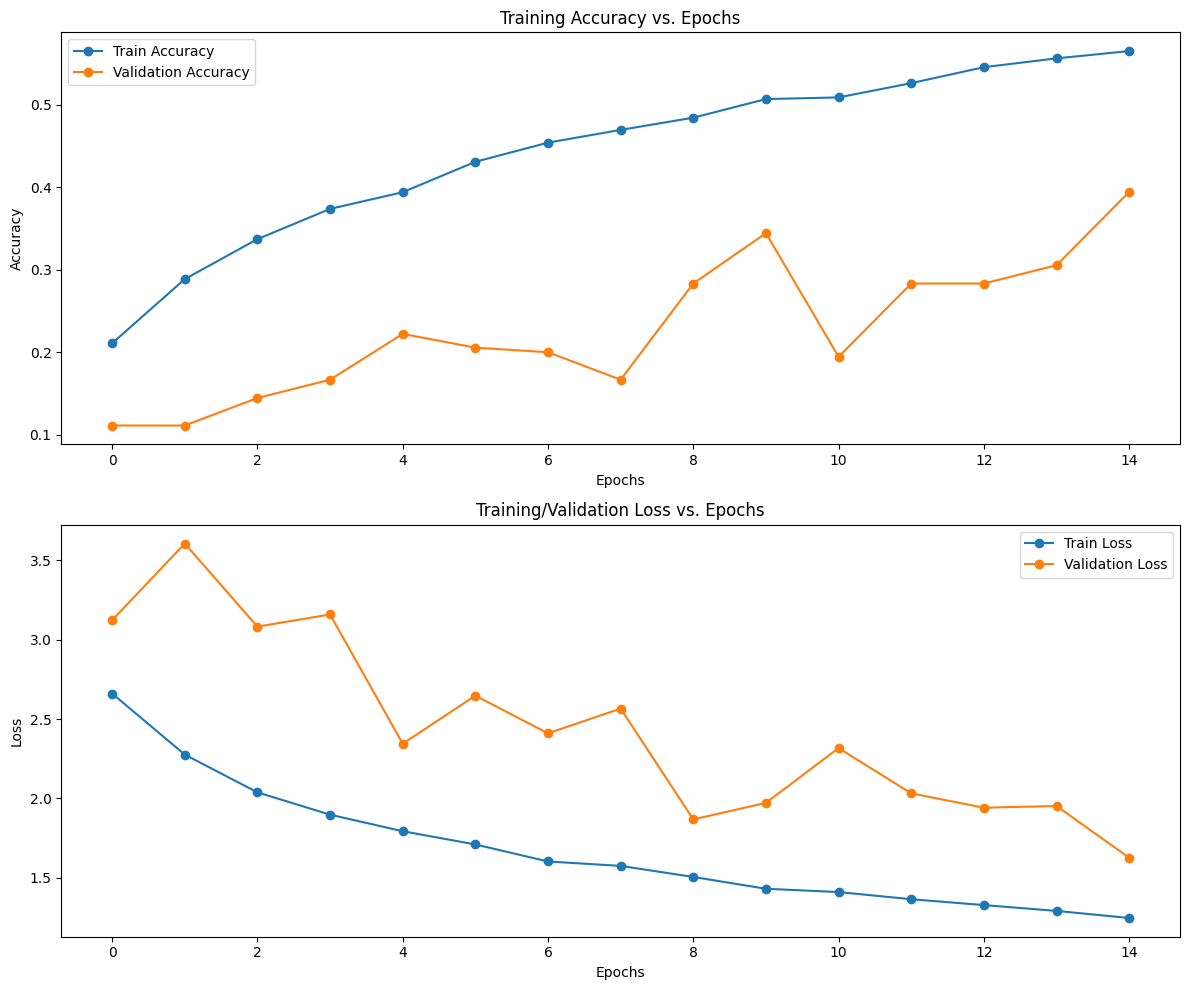

In [18]:
# Plotting the Model Metrics
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

### Balance Weights for Model Improvement
- The balanced weight is a widely used method for imbalanced classification models.
- It penalizes the minority classes by giving more weight to the loss function.


In [19]:
# The Dataset has different number of images in each class, hence used class weights to balance the dataset
from sklearn.utils import class_weight
train_labels = train_generator.classes
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights_dict = dict(enumerate(class_weights))

In [20]:
history = cnn_model.fit(train_generator, epochs= 10, validation_data=valid_generator,
                        verbose=1,
                        class_weight=class_weights_dict, callbacks=[callbacks, reduce_lr]) 

Epoch 1/10
 10/138 ━━━━━━━━━━━━━━━━━━━━ 3:20 2s/step - accuracy: 0.5568 - loss: 1.2168

I0000 00:00:1730787147.785001    3944 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion', 48 bytes spill stores, 48 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_2', 36 bytes spill stores, 36 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_reduce_window_fusion_4', 24 bytes spill stores, 24 bytes spill loads



138/138 ━━━━━━━━━━━━━━━━━━━━ 83s 480ms/step - accuracy: 0.5600 - loss: 1.2695 - val_accuracy: 0.2778 - val_loss: 1.8908 - learning_rate: 9.4868e-05
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 59s 408ms/step - accuracy: 0.5613 - loss: 1.2327 - val_accuracy: 0.4778 - val_loss: 1.4649 - learning_rate: 9.4868e-05
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 59s 405ms/step - accuracy: 0.5986 - loss: 1.1866 - val_accuracy: 0.4722 - val_loss: 1.5064 - learning_rate: 9.4868e-05
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 59s 404ms/step - accuracy: 0.5857 - loss: 1.1856 - val_accuracy: 0.3889 - val_loss: 1.6519 - learning_rate: 9.4868e-05
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 58s 399ms/step - accuracy: 0.5921 - loss: 1.1694 - val_accuracy: 0.4722 - val_loss: 1.5222 - learning_rate: 9.4868e-05
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 59s 403ms/step - accuracy: 0.5766 - loss: 1.1964 - val_accuracy: 0.5111 - val_loss: 1.4100 - learning_rate: 9.4868e-05
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 59s 404ms/step - 

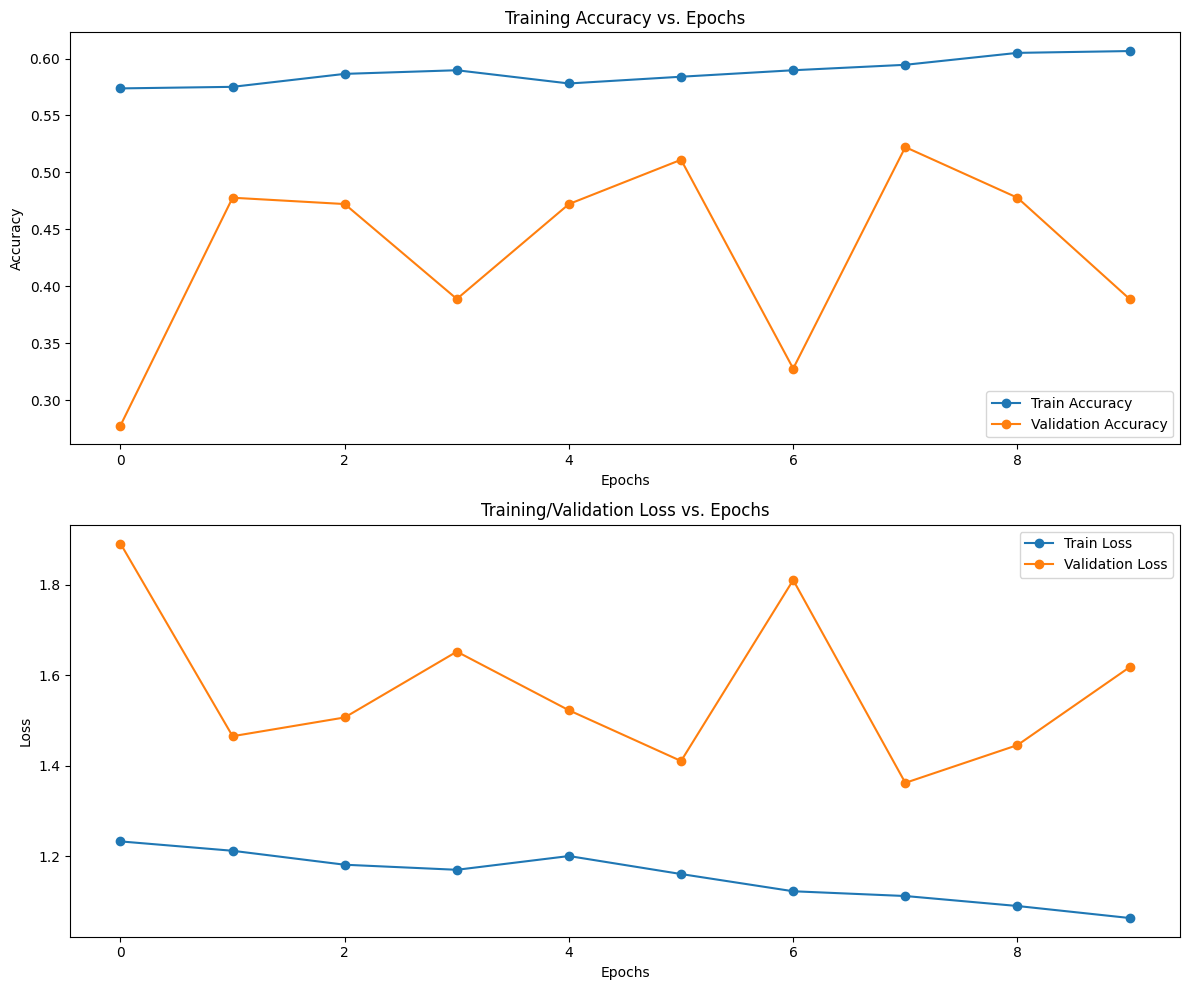

In [21]:
# Plotting the Model Metrics

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

### Analysis:
- From the above results and plots, we can see that there an improvement in the model performance after balancing the weights. 
- The accuracy and loss of the train and validation sets improved significantly. 

### Model Prediction on the Validation Dataset

In [22]:
predictions = cnn_model.predict(valid_generator)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step


In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(12, 10))
idx = 0

for i in range(3):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(valid_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Predictions", fontsize=20)
plt.show()

In [23]:
val_acc, val_loss = cnn_model.evaluate(valid_generator, batch_size=32)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.3816 - loss: 1.5883


### Classification Report
- Classsification report compares the actual and predicted labels for the validation dataset.
- Precision is the percentage of correct predictions for the predicted class.
- Recall is the percentage of samples captured by the model for the class.
- F1-score is the harmonic value of precision and recall. It is **2 x precision x recall/(precision+recall)**.
- Support has the count of samples for each class.

In [24]:
x_val, y_val = [], []
for i in range(len(valid_generator)):

    batch_x, batch_y = valid_generator[i]
    x_val.append(batch_x)
    y_val.append(batch_y)

x_val = np.concatenate(x_val)
y_val = np.concatenate(y_val)

y_pred = cnn_model.predict(x_val)

target_names = list(labels.values())
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_val, axis=1), y_pred_classes, target_names=target_names))

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step
                     precision    recall  f1-score   support

          Cardboard       1.00      0.05      0.10        20
      Food Organics       0.82      0.45      0.58        20
              Glass       0.28      0.25      0.26        20
              Metal       0.75      0.30      0.43        20
Miscellaneous Trash       0.12      0.05      0.07        20
              Paper       1.00      0.40      0.57        20
            Plastic       0.18      0.85      0.30        20
      Textile Trash       0.59      0.65      0.62        20
         Vegetation       1.00      0.50      0.67        20

           accuracy                           0.39       180
          macro avg       0.64      0.39      0.40       180
       weighted avg       0.64      0.39      0.40       180



### Model Prediction on test image

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Cardboard


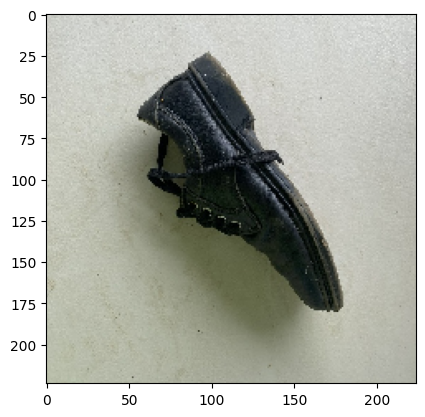

In [25]:
img = keras.utils.load_img("/kaggle/input/landfillwaste/prediction/Test/test_image_106.jpg" , target_size=target_size)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis


y_proba = cnn_model.predict(img_array)
print(y_proba)

p_label = labels[np.argmax(y_proba)]
print(p_label)
   


### Report: We have build a cnn model from scratch with 4 layers and trainied it on the waste image dataset. Now let's try model building with pretrained models and see if there is any improvement in accuracy.


## b. Pretrained ResNet50 Model
- ResNet-50 is a pretrained Deep Learning model for image classification of the Convolutional Neural Network(CNN, or ConvNet), which is a class of deep neural networks, most commonly applied to analyzing visual imagery.
- ResNet-50 is 50 layers deep that enable it to learn much deeper architectures than previously possible without encountering the problem of vanishing gradients and is trained on a million images of 1000 categories from the ImageNet database. 
- Even though the ResNet is much deeper, the model size is actually substantially smaller due to the usage of global average pooling rather than fully-connected layers.
- Furthermore the model has over 23 million trainable parameters, which indicates a deep architecture that makes it better for image recognition.
- The architecture of ResNet50 is divided into four main parts: 
  - convolutional layers -  responsible for extracting features from the input image
  - identity block - process and transform these features
  - convolutional block - process and transform these features 
  - fully connected layers - make the final classification
  

 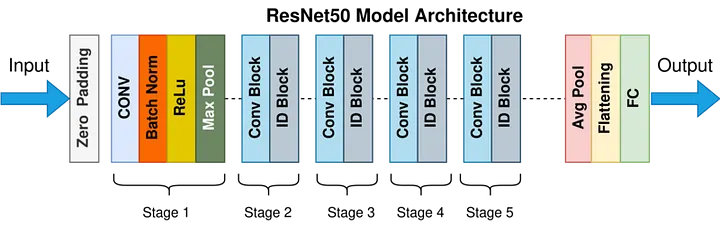


In [26]:
target_size = (224,224)
batch_size = 32

# Performing augmentation only on the training data
traingen = ImageDataGenerator(    
    preprocessing_function= tf.keras.applications.resnet50.preprocess_input  # preprocess
)

train_ds = traingen.flow_from_directory(train_images_path,
                                            batch_size= 32,
                                            shuffle=True,   
                                            seed = 100,
                                            class_mode='categorical',
                                            target_size= target_size
                                            )



Found 4392 images belonging to 9 classes.


In [27]:
validgen = ImageDataGenerator(preprocessing_function= tf.keras.applications.resnet50.preprocess_input) # preprocess
valid_ds = validgen.flow_from_directory(validation_images_path,
                                          shuffle=True,
                                          batch_size = 32,
                                          seed = 125,
                                          class_mode = 'categorical',
                                          target_size = (target_size) 
                                         )

Found 180 images belonging to 9 classes.


In [28]:
resnet50_model = ResNet50(input_shape=(224, 224, 3),
                          include_top=False,
                          weights='imagenet', pooling='avg')

# freezing the weights
for layer in resnet50_model.layers:
            layer.trainable=False
        

In [29]:
# Build the Model
#pool = tf.keras.layers.GlobalAveragePooling2D()(resnet50_model.output)
#flat = Flatten()(pool)
flat = Flatten()(resnet50_model.output)
# Add the last layer
output_layer = Dense(9, activation='softmax')(flat)
model1 = Model(inputs = resnet50_model.input, outputs = output_layer)

In [30]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
callbacks = [
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=5, min_lr = 1e-6),
    EarlyStopping(monitor='val_accuracy', patience=5)     #,restore_best_weights=True)
]

history = model1.fit(train_ds,validation_data=valid_ds,epochs = 10,verbose= 1) #,callbacks=callbacks)

Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 43s 231ms/step - accuracy: 0.5126 - loss: 1.3793 - val_accuracy: 0.7667 - val_loss: 0.6756
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 21s 146ms/step - accuracy: 0.8114 - loss: 0.5442 - val_accuracy: 0.8111 - val_loss: 0.5215
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 21s 145ms/step - accuracy: 0.8618 - loss: 0.4085 - val_accuracy: 0.7833 - val_loss: 0.4938
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 22s 152ms/step - accuracy: 0.9000 - loss: 0.3204 - val_accuracy: 0.8056 - val_loss: 0.4565
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 21s 143ms/step - accuracy: 0.9189 - loss: 0.2685 - val_accuracy: 0.8556 - val_loss: 0.4191
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 22s 151ms/step - accuracy: 0.9327 - loss: 0.2328 - val_accuracy: 0.8389 - val_loss: 0.4058
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 22s 149ms/step - accuracy: 0.9549 - loss: 0.1866 - val_accuracy: 0.8278 - val_loss: 0.4179
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 22s 148ms/step - accuracy: 0.9614 - loss: 0

In [ ]:
#predictions = model1.predict(valid_ds)
# Classification Report
#y_pred = np.argmax(predictions, axis=1)
#y_true = valid_ds.classes
#print(classification_report(y_true, y_pred, target_names= labels1.values()))

In [32]:
x_val, y_val = [], []
for i in range(len(valid_ds)):

    batch_x, batch_y = valid_ds[i]
    x_val.append(batch_x)
    y_val.append(batch_y)

x_val = np.concatenate(x_val)
y_val = np.concatenate(y_val)

y_pred = model1.predict(x_val)

target_names = list(labels.values())
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_val, axis=1), y_pred_classes, target_names=target_names))

6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 638ms/step
                     precision    recall  f1-score   support

          Cardboard       0.86      0.90      0.88        20
      Food Organics       0.90      0.95      0.93        20
              Glass       1.00      0.95      0.97        20
              Metal       0.83      0.95      0.88        20
Miscellaneous Trash       0.73      0.80      0.76        20
              Paper       0.84      0.80      0.82        20
            Plastic       0.88      0.70      0.78        20
      Textile Trash       0.89      0.85      0.87        20
         Vegetation       0.90      0.90      0.90        20

           accuracy                           0.87       180
          macro avg       0.87      0.87      0.87       180
       weighted avg       0.87      0.87      0.87       180



{0: 'Cardboard', 1: 'Food Organics', 2: 'Glass', 3: 'Metal', 4: 'Miscellaneous Trash', 5: 'Paper', 6: 'Plastic', 7: 'Textile Trash', 8: 'Vegetation'}


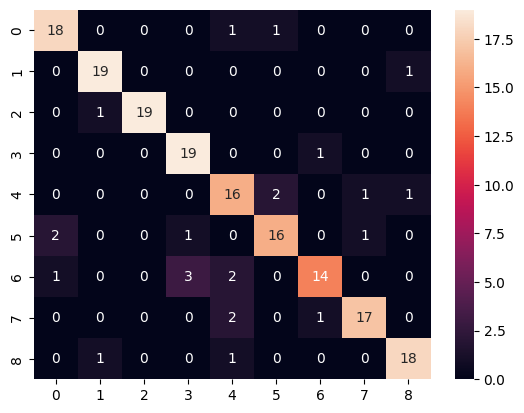

In [33]:
cm = confusion_matrix(np.argmax(y_val, axis=1), y_pred_classes)
sns.heatmap(cm, annot=True)
print(labels)

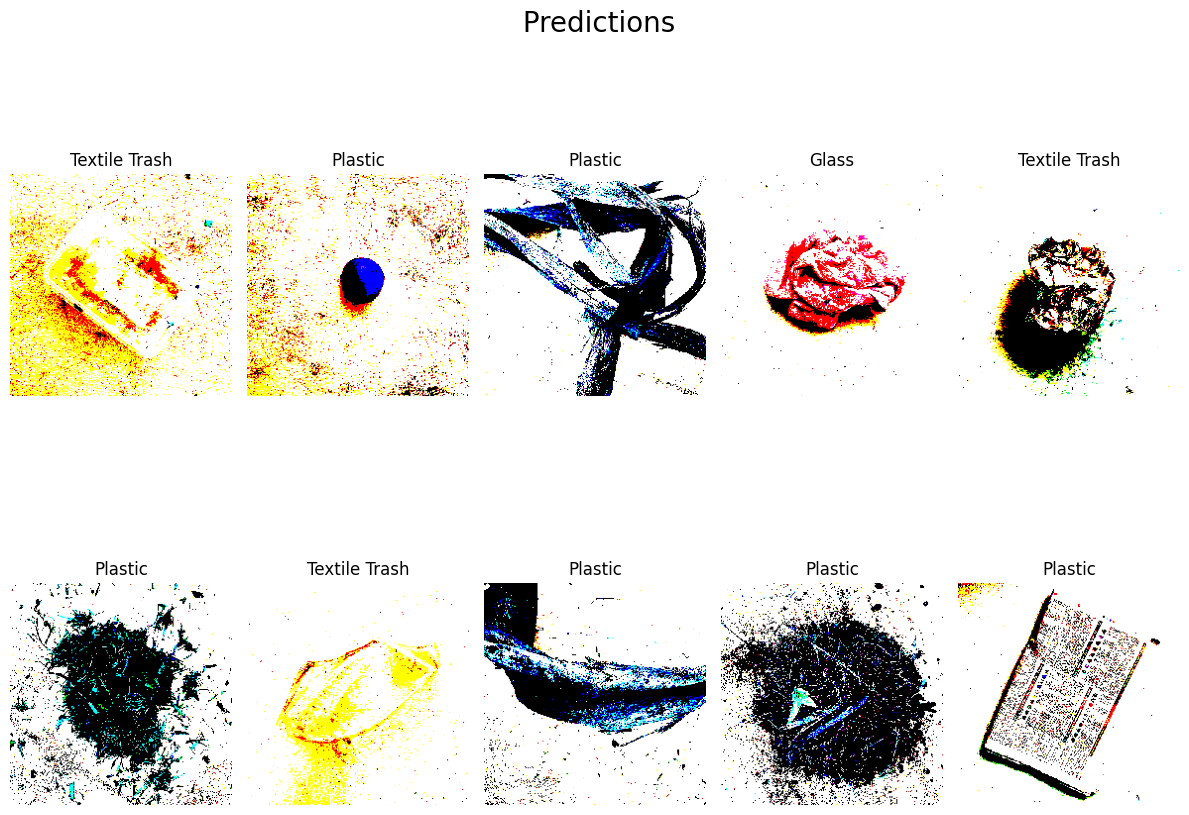

In [34]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(valid_ds[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle(" Predictions", fontsize=20)
plt.show()

In [35]:
data_his = pd.DataFrame(history.history)
data_his

accuracy      loss  val_accuracy  val_loss
0  0.647541  0.989841      0.766667  0.675608
1  0.816485  0.536363      0.811111  0.521505
2  0.862933  0.408794      0.783333  0.493763
3  0.892987  0.328959      0.805556  0.456523
4  0.917350  0.272325      0.855556  0.419060
5  0.933288  0.233977      0.838889  0.405849
6  0.946038  0.198717      0.827778  0.417934
7  0.957423  0.174699      0.866667  0.422091
8  0.964253  0.153745      0.888889  0.362109
9  0.969718  0.134457      0.866667  0.374433

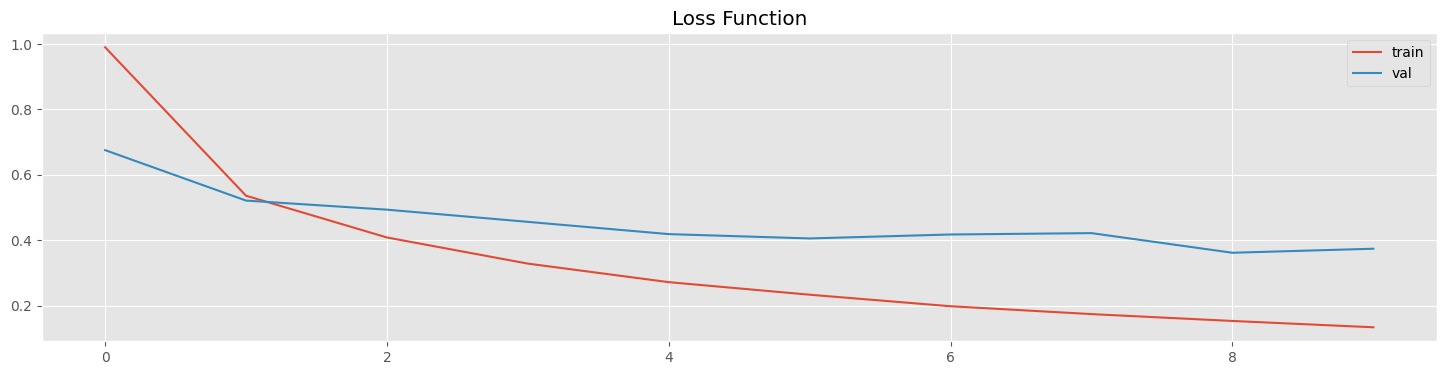

In [36]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['loss'], label = 'train')
plt.plot(data_his['val_loss'], label = 'val')
plt.legend()
plt.title('Loss Function')
plt.show()
fig.savefig("Loss Function",dpi=700)

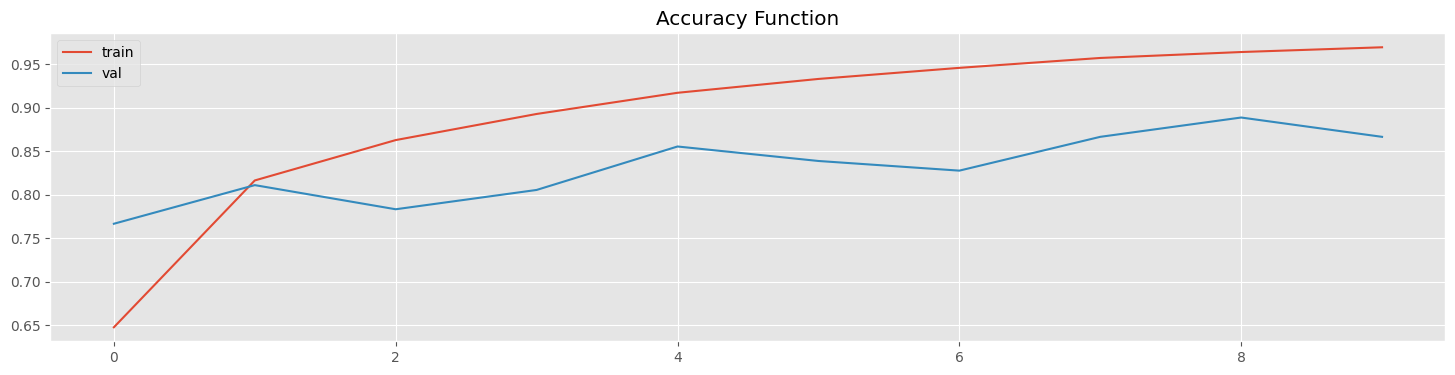

In [37]:
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['accuracy'], label = 'train')
plt.plot(data_his['val_accuracy'], label = 'val')
plt.legend()
plt.title('Accuracy Function')
plt.show()
fig.savefig("Accuracy Function",dpi=700)

### Model prediction on test image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The predicted class is Paper


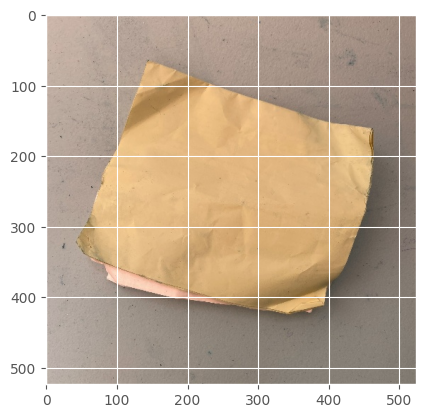

In [45]:
import cv2
image = cv2.imread("/kaggle/input/landfillwaste/prediction/Test/test_image_120.jpg")
plt.imshow(image)

image_resized = cv2.resize(image, (224, 224))
image = np.expand_dims(image_resized, axis=0)


# Make predictions
image_pred = model1.predict(image)


# Produce a human-readable output label
image_output_class = labels[np.argmax(image_pred)]
print("The predicted class is", image_output_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class : Vegetation


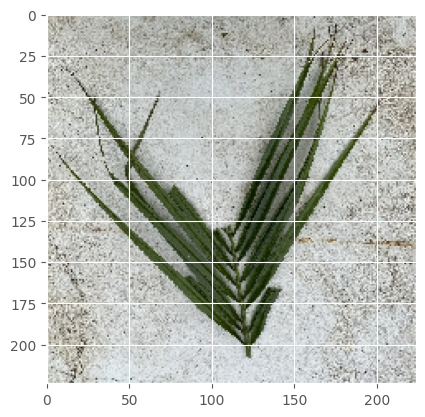

In [74]:
img = keras.utils.load_img("/kaggle/input/landfillwaste/prediction/Test/test_image_10.jpg" , target_size=target_size)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis
img = keras.applications.resnet50.preprocess_input(img_array)

image_pred = model1.predict(img_array)

# Produce a human-readable output label
image_output_class = labels[np.argmax(image_pred)]
print("Predicted class :", image_output_class)



## c. Pretrained Xception Model
- Xception which stands for Extreme version of Inception with a modified version of depthwise seperable convolution is better than Inception-v3 for Image classification applications.

In [77]:
target_size = (224,224)
batch_size = 32

# Performing augmentation only on the training data
train_gen = ImageDataGenerator(    
    preprocessing_function= tf.keras.applications.xception.preprocess_input  # preprocess
)

train_ds = train_gen.flow_from_directory(train_images_path,
                                            batch_size= 32,
                                            shuffle=True,   
                                            seed = 100,
                                            class_mode='categorical',
                                            target_size= target_size
                                            )



Found 4392 images belonging to 9 classes.


In [78]:
valid_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.xception.preprocess_input) # preprocess
valid_ds = valid_gen.flow_from_directory(validation_images_path,
                                          shuffle=True,
                                          batch_size = 32,
                                          seed = 125,
                                          class_mode = 'categorical',
                                          target_size = (target_size) 
                                         )

Found 180 images belonging to 9 classes.


### Let's load an Xception model pretrained on ImageNet.
### We exclude the top of the layer of the network by setting include-top = False, this excludes the global average pooling layer and the dense layer.
### We then add our  own global average pooling layer, based on the output of the model, followed by a dense layer with 1 unit per class, using the softmax function.
### It is usually a good idea to freeze the weights of the pretrained layers in the beginning of training, to avoid large error gradients that may weck the reused weights.
### Freezing during the few intial epochs gives the new layer some time to learn reasonable weights.

In [79]:
xception_model = Xception(
                    include_top=False,
                    weights='imagenet',
                   )

pooling = keras.layers.GlobalAveragePooling2D()(xception_model.output)
output_layer = Dense(9 , activation ="softmax")(pooling)
model2 = Model(inputs = xception_model.input , outputs = output_layer)


for layer in xception_model.layers:
    layer.trainable = False

In [80]:
#optimizer = keras.optimizers.SGD(learning_rate = 0.2 , momentum = 0.9 , decay = 0.01)
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])     

In [81]:
#callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode ='min', patience=3,restore_best_weights=True)
history = model2.fit(train_ds,validation_data=valid_ds, epochs =10)

Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 33s 192ms/step - accuracy: 0.4907 - loss: 1.4612 - val_accuracy: 0.7056 - val_loss: 0.8072
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - accuracy: 0.7632 - loss: 0.7108 - val_accuracy: 0.7278 - val_loss: 0.7218
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 19s 131ms/step - accuracy: 0.8098 - loss: 0.5830 - val_accuracy: 0.7389 - val_loss: 0.6902
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 19s 133ms/step - accuracy: 0.8255 - loss: 0.5147 - val_accuracy: 0.8000 - val_loss: 0.6151
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.8599 - loss: 0.4402 - val_accuracy: 0.8056 - val_loss: 0.6292
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.8676 - loss: 0.4095 - val_accuracy: 0.8000 - val_loss: 0.6017
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 19s 133ms/step - accuracy: 0.8917 - loss: 0.3648 - val_accuracy: 0.8000 - val_loss: 0.5882
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.9014 - loss: 0

In [82]:
x_val, y_val = [], []
for i in range(len(valid_ds)):

    batch_x, batch_y = valid_ds[i]
    x_val.append(batch_x)
    y_val.append(batch_y)

x_val = np.concatenate(x_val)
y_val = np.concatenate(y_val)

y_pred = model2.predict(x_val)

target_names = list(labels.values())
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_val, axis=1), y_pred_classes, target_names=target_names))

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 442ms/step
                     precision    recall  f1-score   support

          Cardboard       0.85      0.85      0.85        20
      Food Organics       0.86      0.90      0.88        20
              Glass       1.00      0.65      0.79        20
              Metal       0.65      0.85      0.74        20
Miscellaneous Trash       0.81      0.65      0.72        20
              Paper       0.81      0.85      0.83        20
            Plastic       0.68      0.75      0.71        20
      Textile Trash       0.85      0.85      0.85        20
         Vegetation       0.90      0.95      0.93        20

           accuracy                           0.81       180
          macro avg       0.82      0.81      0.81       180
       weighted avg       0.82      0.81      0.81       180



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted class : Miscellaneous Trash


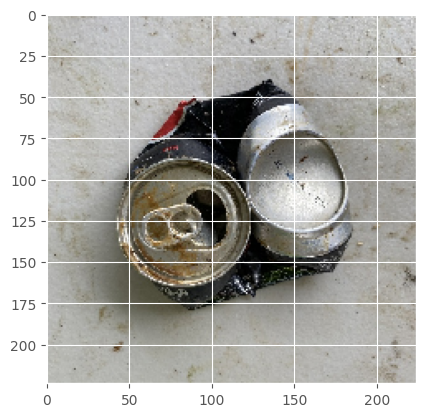

In [85]:
img = keras.utils.load_img("/kaggle/input/landfillwaste/prediction/Test/test_image_102.jpg" , target_size=target_size)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis
img = tf.keras.applications.xception.preprocess_input(img_array)

image_pred = model2.predict(img_array)

# Produce a human-readable output label
image_output_class = labels[np.argmax(image_pred)]
print("Predicted class :", image_output_class)

In [ ]:
"""
predictions = model2.predict(valid_ds)
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(valid_ds[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle(" Predictions", fontsize=20)
plt.show()

"""

In [ ]:
data_his = pd.DataFrame(history.history)
data_his

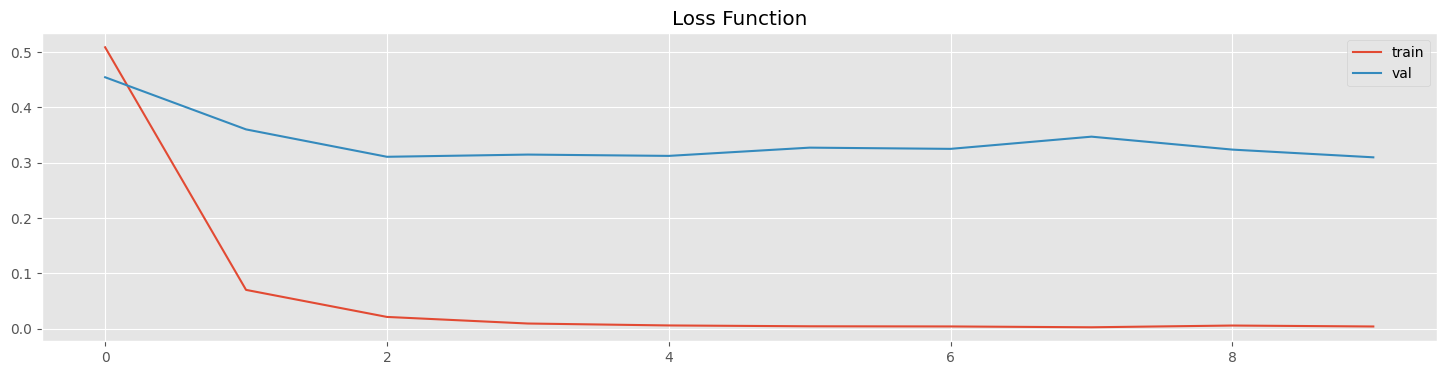

In [86]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['loss'], label = 'train')
plt.plot(data_his['val_loss'], label = 'val')
plt.legend()
plt.title('Loss Function')
plt.show()
fig.savefig("Loss Function",dpi=700)

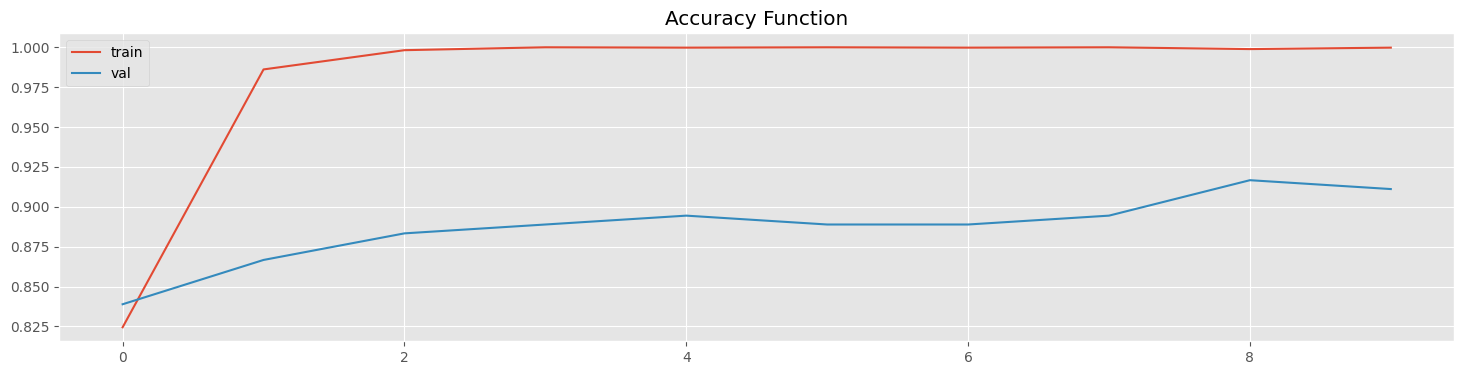

In [87]:
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['accuracy'], label = 'train')
plt.plot(data_his['val_accuracy'], label = 'val')
plt.legend()
plt.title('Accuracy Function')
plt.show()
fig.savefig("Accuracy Function",dpi=700)

### The validation accuracy reached to 80-82% after training the model for 10 epochs. 
### This means the top layers are now well trained, so now let's unfreeze all the layers and continue the training.
### We must lower the learning rate to avoid damaging the pretrained weights.

In [88]:
for layer in xception_model.layers:
    layer.trainable = True

In [89]:
optimizer = Adam(learning_rate= 1e-4)
model2.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])     

In [90]:
#callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode ='min', verbose =1) #, patience=3,restore_best_weights=True
history = model2.fit(train_ds,validation_data=valid_ds, epochs =10)  # , callbacks=[callbacks])

Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 81s 350ms/step - accuracy: 0.7748 - loss: 0.6581 - val_accuracy: 0.8778 - val_loss: 0.3850
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 37s 257ms/step - accuracy: 0.9846 - loss: 0.0773 - val_accuracy: 0.8833 - val_loss: 0.3677
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 36s 256ms/step - accuracy: 0.9980 - loss: 0.0214 - val_accuracy: 0.8722 - val_loss: 0.3903
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 36s 256ms/step - accuracy: 0.9999 - loss: 0.0094 - val_accuracy: 0.8778 - val_loss: 0.3925
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 36s 257ms/step - accuracy: 0.9998 - loss: 0.0070 - val_accuracy: 0.8889 - val_loss: 0.3670
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 37s 257ms/step - accuracy: 0.9999 - loss: 0.0055 - val_accuracy: 0.8833 - val_loss: 0.4085
Epoch 7/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 36s 256ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.8833 - val_loss: 0.3981
Epoch 8/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 36s 256ms/step - accuracy: 0.9997 - loss: 0

In [91]:
x_val, y_val = [], []
for i in range(len(valid_ds)):

    batch_x, batch_y = valid_ds[i]
    x_val.append(batch_x)
    y_val.append(batch_y)

x_val = np.concatenate(x_val)
y_val = np.concatenate(y_val)

y_pred = model2.predict(x_val)

target_names = list(labels.values())
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_val, axis=1), y_pred_classes, target_names=target_names))

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 430ms/step
                     precision    recall  f1-score   support

          Cardboard       0.89      0.80      0.84        20
      Food Organics       0.95      0.95      0.95        20
              Glass       0.95      0.90      0.92        20
              Metal       0.82      0.90      0.86        20
Miscellaneous Trash       0.74      0.70      0.72        20
              Paper       0.86      0.90      0.88        20
            Plastic       0.67      0.80      0.73        20
      Textile Trash       0.94      0.85      0.89        20
         Vegetation       0.95      0.90      0.92        20

           accuracy                           0.86       180
          macro avg       0.86      0.86      0.86       180
       weighted avg       0.86      0.86      0.86       180



{0: 'Cardboard', 1: 'Food Organics', 2: 'Glass', 3: 'Metal', 4: 'Miscellaneous Trash', 5: 'Paper', 6: 'Plastic', 7: 'Textile Trash', 8: 'Vegetation'}


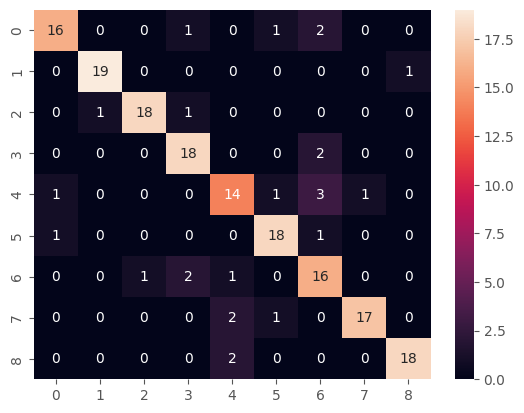

In [92]:
cm = confusion_matrix(np.argmax(y_val, axis=1), y_pred_classes)
sns.heatmap(cm, annot=True)
print(labels)

In [93]:
data_his = pd.DataFrame(history.history)
data_his

accuracy      loss  val_accuracy  val_loss
0  0.824909  0.502883      0.877778  0.384991
1  0.986339  0.069611      0.883333  0.367738
2  0.998178  0.021567      0.872222  0.390338
3  0.999772  0.009407      0.877778  0.392470
4  0.999545  0.007298      0.888889  0.366990
5  0.999772  0.005497      0.883333  0.408484
6  1.000000  0.002952      0.883333  0.398084
7  0.999089  0.004707      0.861111  0.491619
8  0.995219  0.018339      0.894444  0.364800
9  0.994080  0.021197      0.855556  0.495412

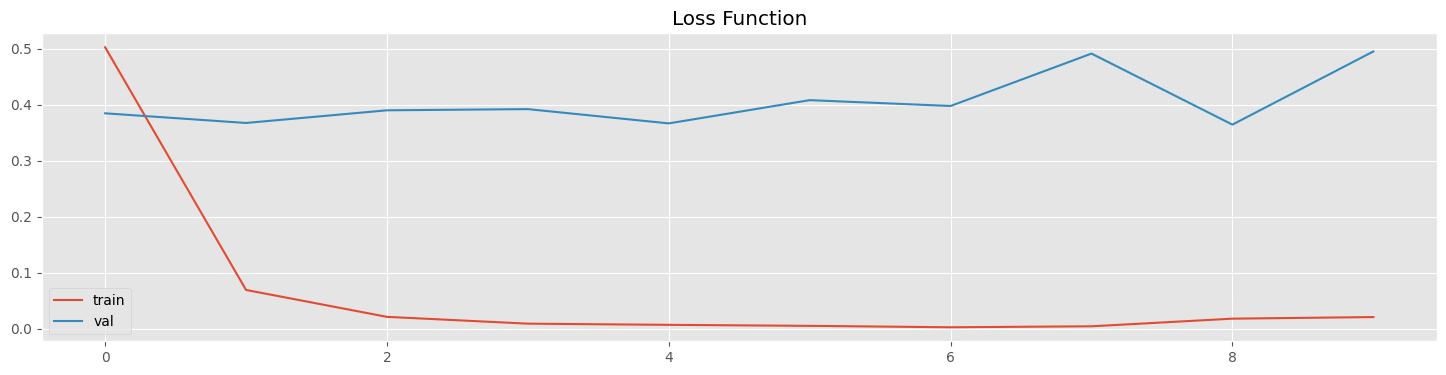

In [94]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['loss'], label = 'train')
plt.plot(data_his['val_loss'], label = 'val')
plt.legend()
plt.title('Loss Function')
plt.show()
fig.savefig("Loss Function",dpi=700)

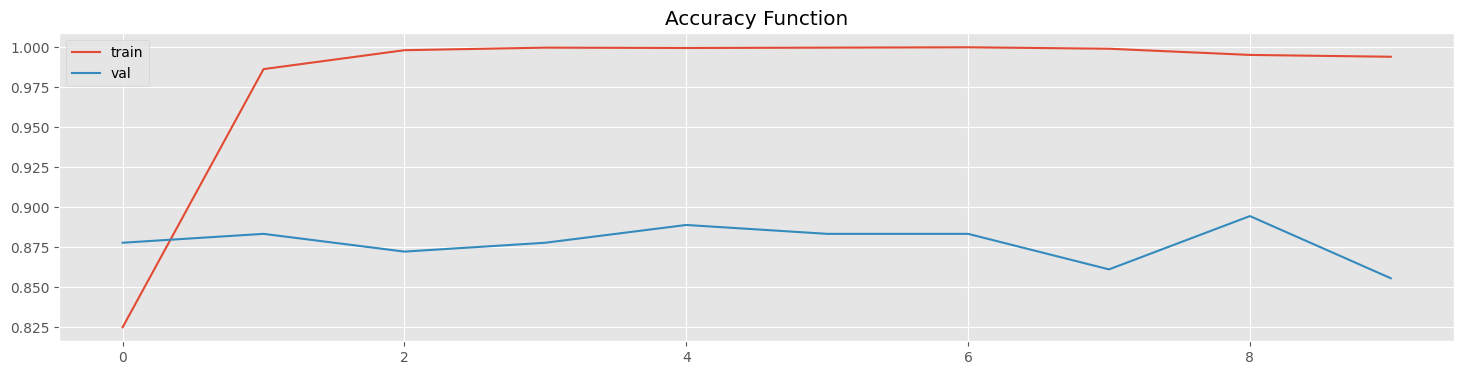

In [95]:
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['accuracy'], label = 'train')
plt.plot(data_his['val_accuracy'], label = 'val')
plt.legend()
plt.title('Accuracy Function')
plt.show()
fig.savefig("Accuracy Function",dpi=700)

### Model testing on a sample test image

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step
Predicted class : Miscellaneous Trash


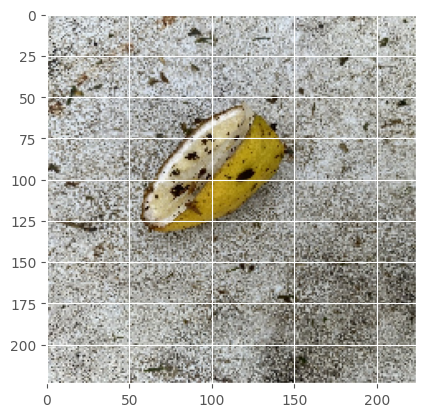

In [96]:
img = keras.utils.load_img("/kaggle/input/landfillwaste/prediction/Test/test_image_100.jpg" , target_size=target_size)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis
img = tf.keras.applications.xception.preprocess_input(img_array)

image_pred = model2.predict(img_array)

# Produce a human-readable output label
image_output_class = labels[np.argmax(image_pred)]
print("Predicted class :", image_output_class)


## Results and Conclusions
- From the above study and results, for multilabel image classification applications, pretrained models work better than a scratch cnn model. 
- The training time along with accuracy and loss is better with pretrained modelss
- We could further incresae the size of the training data(by augmentation or collecting mopre pictures) and number of epochs to check for imporovement on the validation accuracy and loss.
- | Model             | Validation_Accuracy | validation_Loss |Epochs
  | :---------------- | :------: | ----: |:----:|
  | CNN(scratch)        |   0.40 | 1.6270 |15|
  | CNN_weights_balanced           |  0.6109| 1.61 |10|
  | ResNet50   |  0.8833 |0.3786 |10|
  | Xception_top_layers_freezed |  0.8444 | 0.5673 |10|
  | Xception_top_layers_unfreezed |  0.9111 |0.3097 |10|
